In [227]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('U:/Desktop/AOC_2022/')

small = False

if small:
    with open('input12_small.txt') as f:
        data = f.read().splitlines()
else: 
    with open('input12.txt') as f:
        data = f.read().splitlines()
        

In [228]:
heightmap = {}
starts = []
for y, line in enumerate(data):
    max_y = y
    for x, height_char in enumerate(line):
        max_x=x
        if height_char == "S":
            start = (x, y)
            height = ord("a")
        elif height_char == "E":
            end = (x, y)
            height = ord("z")
        else:
            if height_char == "a":
                starts.append((x, y))

            height = ord(height_char)

        heightmap[(x, y)] = height

starts = [start] + starts


In [229]:
def neighbours(heightmap, coordinate):
    x,y = coordinate
    adjacent = [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]
    return [c for c in adjacent if (c in heightmap) and (heightmap[c] <= (heightmap[coordinate] +1))]

In [230]:


def find_paths(heightmap,start,end):

    queue = {start:0}
    path_quickest = {start:0}
    
    while queue:
        queue = {k: v for k, v in sorted(queue.items(), key=lambda item: item[1],reverse=True)}
        coordinate,n_steps = queue.popitem()

        if coordinate == end:
            return n_steps
        
        for neighbour in neighbours(heightmap,coordinate):
            n_steps_new = n_steps +1
            
            if (neighbour not in path_quickest.keys()) or (n_steps_new < path_quickest[neighbour]):
                path_quickest[neighbour] = n_steps_new
                queue[neighbour] = n_steps_new
               


In [231]:
steps = [find_paths(heightmap,start,end) for start in starts]
print(f'Answer 1: {steps[0]}')
print(f'Answer 2: {min(x for x in steps if x is not None)}')


Answer 1: 330
Answer 2: 321


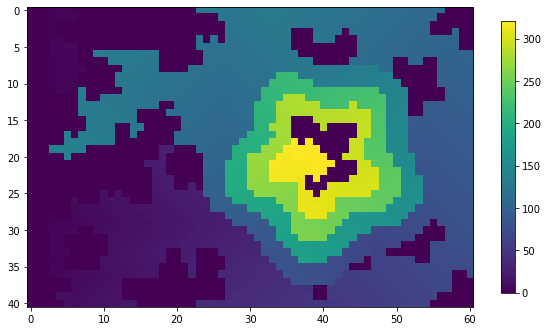

In [232]:
matrix = np.zeros([max_y+1,max_x+1])

for k,v in path_quickest.items():
    matrix[k[1],k[0]] = v

fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(matrix)
cbar = ax.figure.colorbar(im,
                            ax=ax,
                            shrink=0.5)
plt.show()